In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the dataset 
df = pd.read_csv(r"C:\Users\siddh\Downloads\archive\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Describe the statistical values of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


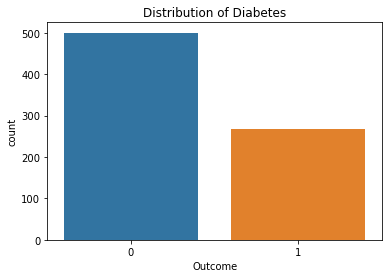

In [6]:
# Visualize the distribution of the target variable 'Outcome'
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes')
plt.show()


In [7]:
# Checking for the non- zero rows and checking the shape of them
num= df[df["SkinThickness"]==0]
num1= df[df["BloodPressure"]==0]
num2= df[df["Glucose"]==0]
num3= df[df["Insulin"]==0]
num4= df[df["BMI"]==0]
num.shape,num1.shape,num2.shape,num3.shape,num4.shape

((227, 9), (35, 9), (5, 9), (374, 9), (11, 9))

In [8]:
# Replacing the zero values with null values
df[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']] = df[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']].replace(0, np.nan)

In [9]:
# Replacing the null values with mean values of the columns
df[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']] = df[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']].fillna(df[['Glucose', 'BloodPressure', 'BMI','Insulin','SkinThickness']].mean())

In [10]:
# Verifying again to ensure there is no non-zero values in the rows
num= df[df["SkinThickness"]==0]
num1= df[df["BloodPressure"]==0]
num2= df[df["Glucose"]==0]
num3= df[df["Insulin"]==0]
num4= df[df["BMI"]==0]
num.shape,num1.shape,num2.shape,num3.shape,num4.shape

((0, 9), (0, 9), (0, 9), (0, 9), (0, 9))

In [11]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
# Label Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [15]:
# Splitting the data set into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1, random_state = 0)

In [13]:
# Applying Random Oversampling to reduce the dominance of one value over the other
ros = RandomOverSampler(random_state=41)
X_ros,y_ros = ros.fit_resample(X,y)

In [16]:
# Perform feature scaling on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Adding dropout to reduce overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Adjusting dropout rate
model.add(Dense(1, activation='sigmoid'))  # For binary classification, use sigmoid activation

In [56]:
# Create an instance of the Adam optimizer with a learning rate of 0.0001
custom_optimizer = Adam(learning_rate=0.01)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Train the model
model.fit(X_train, y_train,
          epochs=75,
          batch_size=32
         )


Epoch 1/75
22/22 [==============================] - 1s 3ms/step - loss: 0.5747 - accuracy: 0.7236
Epoch 2/75
22/22 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7525
Epoch 3/75
22/22 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7395
Epoch 4/75
22/22 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7670
Epoch 5/75
22/22 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.7641
Epoch 6/75
22/22 [==============================] - 0s 5ms/step - loss: 0.4936 - accuracy: 0.7627
Epoch 7/75
22/22 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7540
Epoch 8/75
22/22 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7728
Epoch 9/75
22/22 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.7873
Epoch 10/75
22/22 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.7829
Epoch 11/75
22/22 [

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]= 1
    else:
        y_pred[i]= 0

In [59]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8311688311688312
Confusion Matrix:
[[45  6]
 [ 7 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.76      0.73      0.75        26

    accuracy                           0.83        77
   macro avg       0.81      0.81      0.81        77
weighted avg       0.83      0.83      0.83        77



<AxesSubplot:>

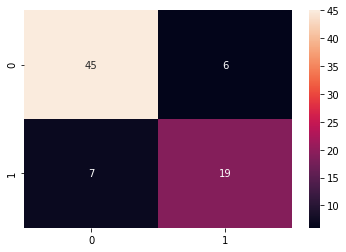

In [60]:
# Data Visulaization using Heatmap(Confusion Matrix)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)